# Classifying Dog Images with Tensorflow and Keras

In [2]:
# Load libraries and packages needed for image classification project
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, preprocessing


In [4]:
dataset = preprocessing.image_dataset_from_directory(
    "Images")

Found 20580 files belonging to 120 classes.


In [5]:
# set the breed of dogs that the program will be classifying 
breeds = dataset.class_names
breeds

['n02085620-Chihuahua',
 'n02085782-Japanese_spaniel',
 'n02085936-Maltese_dog',
 'n02086079-Pekinese',
 'n02086240-Shih-Tzu',
 'n02086646-Blenheim_spaniel',
 'n02086910-papillon',
 'n02087046-toy_terrier',
 'n02087394-Rhodesian_ridgeback',
 'n02088094-Afghan_hound',
 'n02088238-basset',
 'n02088364-beagle',
 'n02088466-bloodhound',
 'n02088632-bluetick',
 'n02089078-black-and-tan_coonhound',
 'n02089867-Walker_hound',
 'n02089973-English_foxhound',
 'n02090379-redbone',
 'n02090622-borzoi',
 'n02090721-Irish_wolfhound',
 'n02091032-Italian_greyhound',
 'n02091134-whippet',
 'n02091244-Ibizan_hound',
 'n02091467-Norwegian_elkhound',
 'n02091635-otterhound',
 'n02091831-Saluki',
 'n02092002-Scottish_deerhound',
 'n02092339-Weimaraner',
 'n02093256-Staffordshire_bullterrier',
 'n02093428-American_Staffordshire_terrier',
 'n02093647-Bedlington_terrier',
 'n02093754-Border_terrier',
 'n02093859-Kerry_blue_terrier',
 'n02093991-Irish_terrier',
 'n02094114-Norfolk_terrier',
 'n02094258-Norwi

In [5]:
# Set the arguments for the tensorflow instance
args = {
    'labels':'inferred',          # Infers the name of the dog by the name of the directory the picture is in
    'label_mode':'categorical',   # Each breed is one category
    'batch_size': 6,             # how many images are loaded and processed at once by neural network
    'image_size': (256,256),      # resize all images to the same size 
    'seed': 1,                    # set seed for reproducability
    'validation_split': .2,       # split training and testing : 80% train and 20% test
    'class_names': breeds         # name of the categories
}

In [7]:
# Training data 

train = tf.keras.utils.image_dataset_from_directory(           # Loads images from directory into tensorflow training dataset
    'C:/Users/maham/Music/Image-Calssification-with-Tensorflow-and-Keras-main/six-class',
    subset='training',
    **args
)

Found 1140 files belonging to 6 classes.
Using 912 files for training.


In [9]:
# Test Data

test = tf.keras.utils.image_dataset_from_directory(           # Loads images from directory into tensorflow  testing dataset
    'six-class',
    subset='validation',
    **args
)

Found 1140 files belonging to 6 classes.
Using 228 files for validation.


In [10]:
train  # Can se that this is a batch dataset, a.k.a batch is a tensorlfow class that represents data loaded into tensorflow

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [11]:
first = train.take(1)   # Saves the first batch of images to a variable 'first'... from above: 1 batch = 32 images


In [12]:
# create two new variables images, which will hold the first 32 images and labels, which will hold the labels of the first 32 images

images, labels = list(first)[0]  


In [13]:
# take a look at the first image in the batch 

first_image = images[0]
#first_image                # saved as a numpy array that holds matrices of numbers coresponding to pixels and RGB content in the image


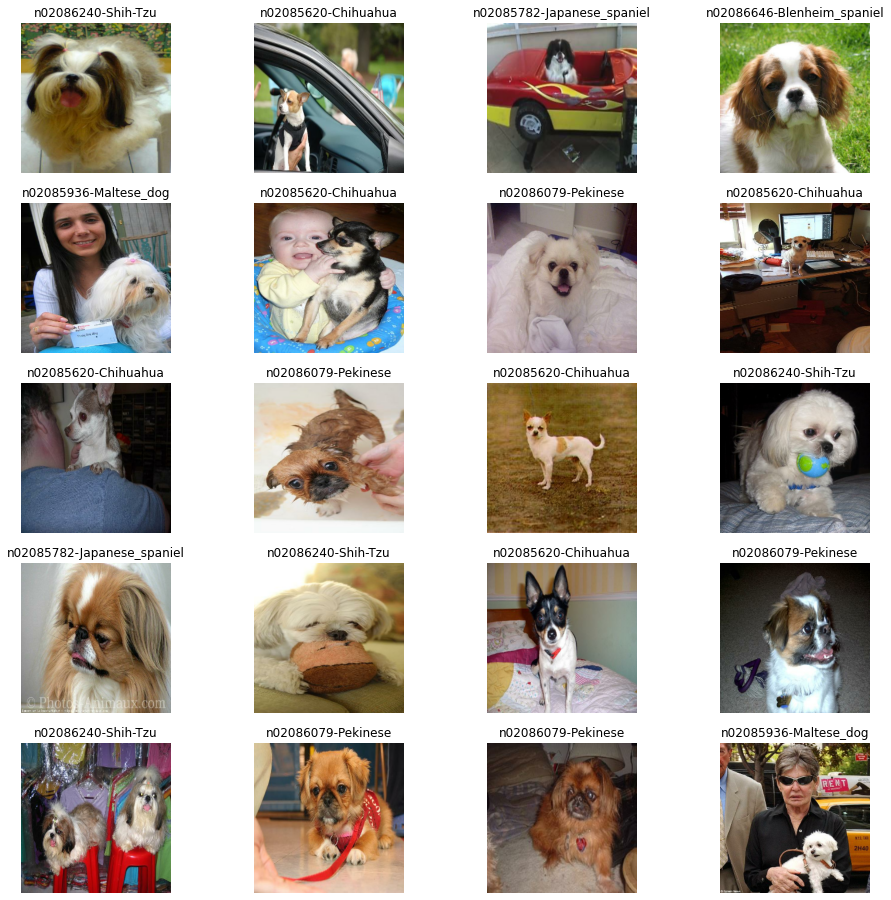

In [14]:
plt.figure(figsize=(16, 16))
for image_batch, labels_batch in dataset.take(1):
    for i in range(20):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(breeds[labels_batch[i]])
        plt.axis("off")

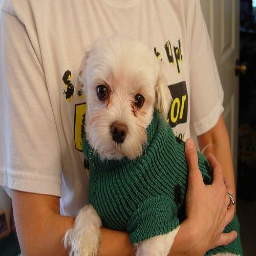

In [15]:
# convert above numpy arrays into the image using Pillow library

from PIL import Image
Image.fromarray(first_image.numpy().astype('uint8'))   # Pillow converts numpy matrices into the image itslef 


In [16]:
labels[0]   # numpy array shows binary inputs that tell us which kind of dog it is

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 0.], dtype=float32)>

In [17]:
train = train.cache().prefetch(buffer_size=tf.data.AUTOTUNE)   # Caches pictures in memory rather than hard disk to make algorithm more efficient
test = test.cache().prefetch(buffer_size=tf.data.AUTOTUNE)   # Caches pictures in memory rather than hard disk to make algorithm more efficient


In [18]:
# import keras packages for modeling and build sequential model

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential ([
    layers.Rescaling(1./255),    # Pixels in numpy array are from 0 - 255, so we rescale the pixels into numbers between 0-1 in order to help neural network be more efficient
    layers.Conv2D(16,3,padding='same',activation='relu',input_shape=(255,255,3)),             # Create a convulutional layer that scans images and generates new matrices with features from the images, will do this 16 times, looking at 3x3 pixels nat a time(window)
    layers.Flatten(),
    layers.Dense(128,activation='relu'),  # dense network will take flattened layer and help facilitate predictions
    layers.Dense(len(breeds))             # this line will make the prediction
])

In [19]:
# Compile the model

model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics =['accuracy'])     # optimizer tells model how to predict error and how to iterate, and loss function calculates error

In [20]:
# fit the model

history = model.fit(
    train,
    validation_data=test,
    epochs=5,
    verbose=1
)

Epoch 1/5
152/152 [==============================] - 185s 1s/step - loss: 21.2256 - accuracy: 0.2292 - val_loss: 1.8339 - val_accuracy: 0.3421
Epoch 2/5
152/152 [==============================] - 166s 1s/step - loss: 1.0140 - accuracy: 0.6568 - val_loss: 1.7926 - val_accuracy: 0.3816
Epoch 3/5
152/152 [==============================] - 164s 1s/step - loss: 0.2977 - accuracy: 0.9331 - val_loss: 1.9049 - val_accuracy: 0.3947
Epoch 4/5
152/152 [==============================] - 155s 1s/step - loss: 0.1136 - accuracy: 0.9825 - val_loss: 2.3787 - val_accuracy: 0.3772
Epoch 5/5
152/152 [==============================] - 161s 1s/step - loss: 0.1062 - accuracy: 0.9912 - val_loss: 2.6307 - val_accuracy: 0.3465


In [21]:
# Summary of the model and its layers / how they are working

model.summary()

# Rescaling layer output the images and rescaled them
# Convulutional layer created 16 matrices of image features
# flattening layer flatened matrices into one lon vector
# Dense layer took that vector and use dit to make prediction
# Dense_3 seperated a single vector for each image indicating which class it belongs to

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 flatten (Flatten)           (None, 1048576)           0         
                                                                 
 dense (Dense)               (None, 128)               134217856 
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 134,219,078
Trainable params: 134,219,078
Non-trainable params: 0
_________________________________________________________________


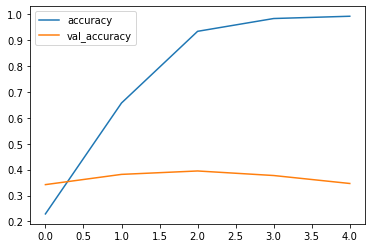

In [22]:
# Graph model accuracy with pandas
import pandas as pd

history_df = pd.DataFrame.from_dict(history.history)
history_df[['accuracy','val_accuracy']].plot();

# Training accuracy went up but validation accuracy did not
# model may be overfit - random features are being implemented by model

In [23]:
# Account for overfitting and increas emodel accuracy
# paste model from before into function so as to not have to change the code every time

def train_model(network,epochs=5):
    model = Sequential(network)
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics =['accuracy'])
    history = model.fit(
    train,
    validation_data=test,
    epochs=5,
    verbose=1
)
    history_df = pd.DataFrame.from_dict(history.history)
    return history_df,model

In [24]:
# same netwrok as before, modified with new layers

network = [
    layers.Rescaling(1./255),    
    layers.Conv2D(16,4,padding='same',activation='relu',input_shape=(256,256,3)),     # increase window size to 4 from 3
    layers.MaxPooling2D(),                                                            # add max pooling 2d layer to reduce overfit and reduce number of parameters
    layers.Conv2D(32,4,padding='same',activation='relu',input_shape=(256,256,3)),     # add second convolutional layer with increased filters to 32, to let network pick up higher level features
    layers.MaxPooling2D(),                                                           # add another max pooling layer
    layers.Conv2D(64,4,padding='same',activation='relu',input_shape=(256,256,3)),    # add another convolutional layer with 64 filters for even higher level features
    layers.MaxPooling2D(),                                                           # another max pooling layer
    layers.Dropout(.2),                                                              # Dropout layer helps with overfitting by setting some outputs to 0 randomly, so network doesnt become too linked to trainjing data
    layers.Flatten(),
    layers.Dense(128,activation='relu'),  
    layers.Dense(len(breeds))             
]

# run model again

history_df,model = train_model(network)

Epoch 1/5
152/152 [==============================] - 78s 499ms/step - loss: 1.8793 - accuracy: 0.2292 - val_loss: 1.7947 - val_accuracy: 0.1842
Epoch 2/5
152/152 [==============================] - 72s 474ms/step - loss: 1.7650 - accuracy: 0.2445 - val_loss: 1.7999 - val_accuracy: 0.2544
Epoch 3/5
152/152 [==============================] - 60s 392ms/step - loss: 1.6870 - accuracy: 0.3213 - val_loss: 1.6562 - val_accuracy: 0.2895
Epoch 4/5
152/152 [==============================] - 75s 497ms/step - loss: 1.4739 - accuracy: 0.4112 - val_loss: 1.8557 - val_accuracy: 0.3596
Epoch 5/5
152/152 [==============================] - 63s 414ms/step - loss: 1.0215 - accuracy: 0.6272 - val_loss: 2.3322 - val_accuracy: 0.3289


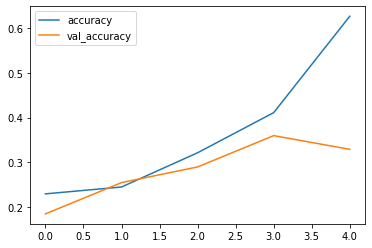

In [25]:
history_df[['accuracy','val_accuracy']].plot();  # not much of an accuracy increase: increase epochs and see changes

# Still overfitting

In [26]:
# Data augmentaion may help with overfitting with keras layers, set to a sequential layer
# set seeds for reproducibility 

data_augmentaion = tf.keras.Sequential([
    layers.RandomFlip('horizontal',seed=1),         # Randomly flips images from left to right which the model wuill see as a new image and increase accuracy
    layers.RandomRotation(.2,seed=1),               # Randomly raotates images for more information
    layers.RandomZoom(.2,seed=1)                   #randomly zooms images for more information for the model 
])

In [27]:
# add netwroks together to create full network

full_network = [data_augmentaion] + network


In [28]:
# Train the full network

history_df, model = train_model(full_network)

Epoch 1/5
152/152 [==============================] - 115s 736ms/step - loss: 1.6497 - accuracy: 0.3421 - val_loss: 1.5535 - val_accuracy: 0.4123
Epoch 2/5
152/152 [==============================] - 122s 805ms/step - loss: 1.5565 - accuracy: 0.3969 - val_loss: 1.4711 - val_accuracy: 0.4386
Epoch 3/5
152/152 [==============================] - 104s 686ms/step - loss: 1.4705 - accuracy: 0.4134 - val_loss: 1.5307 - val_accuracy: 0.3947
Epoch 4/5
152/152 [==============================] - 124s 820ms/step - loss: 1.4351 - accuracy: 0.4243 - val_loss: 1.4693 - val_accuracy: 0.4518
Epoch 5/5
152/152 [==============================] - 160s 1s/step - loss: 1.4133 - accuracy: 0.4518 - val_loss: 1.4630 - val_accuracy: 0.4561


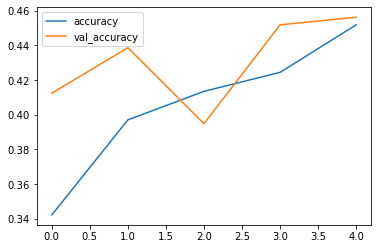

In [29]:
# Plot accuracy again

history_df[['accuracy','val_accuracy']].plot();

# Accuracy is much better now

In [30]:
# Pull predictions out and visulaize them 

preds = model.predict(test)    # large numpy array; convert to pandas dataframe to make it easier to work with


In [31]:
import numpy as np 

predicted_class = np.argmax(preds,axis=1)    # turns predictions into a single number


In [32]:
#Array of index of original breeds 

predicted_class

array([3, 2, 4, 5, 5, 4, 5, 5, 5, 5, 2, 4, 2, 5, 2, 1, 0, 5, 5, 5, 4, 0,
       2, 4, 1, 2, 3, 5, 3, 5, 2, 2, 3, 5, 2, 5, 5, 5, 2, 2, 1, 3, 2, 4,
       2, 2, 2, 3, 3, 5, 2, 1, 2, 5, 5, 2, 5, 5, 5, 1, 5, 1, 3, 2, 0, 5,
       0, 2, 5, 1, 5, 1, 1, 4, 1, 5, 5, 1, 1, 5, 4, 2, 2, 2, 1, 2, 3, 4,
       2, 2, 0, 1, 5, 3, 1, 5, 1, 4, 1, 3, 2, 0, 2, 2, 5, 0, 0, 1, 0, 1,
       4, 5, 5, 5, 3, 5, 5, 2, 0, 2, 2, 1, 3, 2, 2, 3, 2, 5, 1, 4, 4, 3,
       4, 4, 2, 0, 2, 2, 5, 3, 4, 5, 3, 1, 2, 4, 2, 0, 3, 2, 2, 1, 2, 2,
       4, 1, 2, 5, 2, 1, 0, 5, 2, 1, 1, 5, 5, 1, 2, 5, 2, 2, 2, 0, 5, 0,
       5, 2, 2, 2, 1, 5, 5, 2, 5, 2, 2, 2, 1, 3, 2, 0, 2, 3, 3, 0, 0, 2,
       5, 0, 3, 2, 0, 1, 3, 1, 2, 5, 5, 2, 5, 2, 1, 2, 4, 2, 5, 2, 4, 5,
       0, 5, 2, 1, 0, 3, 1, 3], dtype=int64)

In [33]:
actual_labels = np.concatenate([y for x,y in test],axis=0)   # flattens out batches and pulls out labels

In [34]:
actual_labels   # they are vectors so change them to single numbers
actual_class = np.argmax(actual_labels,axis=1)

In [35]:
# Get actual images of the dogs

import itertools

actual_image = [x.numpy().astype('uint8') for x,y in test]
actual_image = list(itertools.chain.from_iterable(actual_image))
actual_image = [Image.fromarray(a) for a in actual_image]

In [36]:
# create datframe from predicted, actual, and the images of the dogs

pred_df = pd.DataFrame(zip(predicted_class,actual_class,actual_image),columns=['prediction','actual','image'])


In [37]:
# change dog breeds from numbers to the actual names

pred_df['prediction'] = pred_df['prediction'].apply(lambda x : breeds[x])
pred_df['actual'] = pred_df['actual'].apply(lambda x : breeds[x])



In [38]:
# Disply Head of dataframe

pred_df.head()


,prediction,actual,image
0,n02086079-Pekinese,n02085620-Chihuahua,<PIL.Image.Image image mode=RGB size=256x256 a...
1,n02085936-Maltese_dog,n02085620-Chihuahua,<PIL.Image.Image image mode=RGB size=256x256 a...
2,n02086240-Shih-Tzu,n02085782-Japanese_spaniel,<PIL.Image.Image image mode=RGB size=256x256 a...
3,n02086646-Blenheim_spaniel,n02086240-Shih-Tzu,<PIL.Image.Image image mode=RGB size=256x256 a...
4,n02086646-Blenheim_spaniel,n02086646-Blenheim_spaniel,<PIL.Image.Image image mode=RGB size=256x256 a...


In [39]:
# Render actal images instead of image data

import base64
import io
def image(img):
    with io.BytesIO() as buffer:
        img.save(buffer,'png')
        img_str = base64.b64encode(buffer.getvalue()).decode()
        return f'<img src="data:image/jpeg;base64,{img_str}">'
  
    
# this is all a little convoluted and had to look up how to do all of this, working with images and HTML
    

,prediction,actual,image
0,n02086079-Pekinese,n02085620-Chihuahua,
1,n02085936-Maltese_dog,n02085620-Chihuahua,
2,n02086240-Shih-Tzu,n02085782-Japanese_spaniel,
3,n02086646-Blenheim_spaniel,n02086240-Shih-Tzu,
4,n02086646-Blenheim_spaniel,n02086646-Blenheim_spaniel,
5,n02086240-Shih-Tzu,n02086240-Shih-Tzu,
6,n02086646-Blenheim_spaniel,n02086240-Shih-Tzu,
7,n02086646-Blenheim_spaniel,n02085620-Chihuahua,
8,n02086646-Blenheim_spaniel,n02086646-Blenheim_spaniel,
9,n02086646-Blenheim_spaniel,n02086646-Blenheim_spaniel,

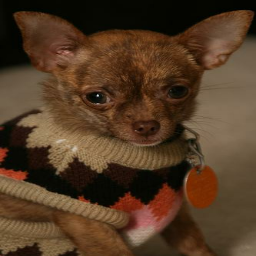
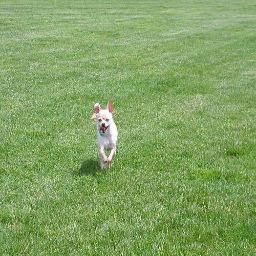
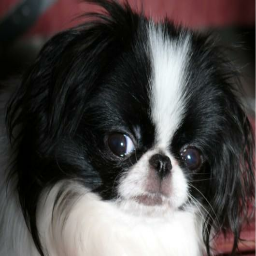
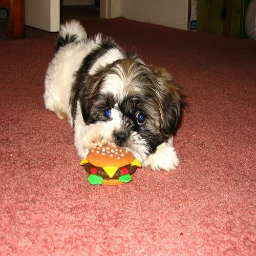
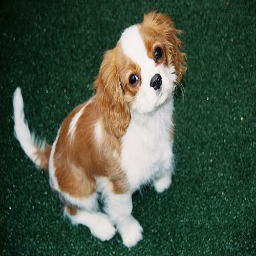
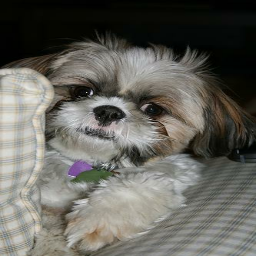
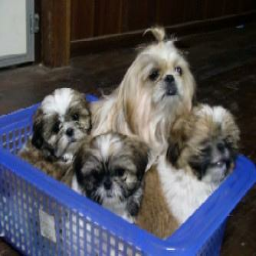
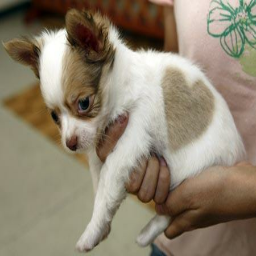
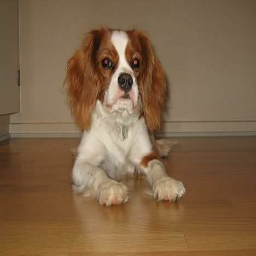
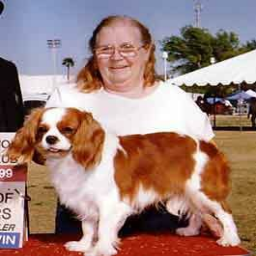

In [40]:
# Look at predictions and acrtual dogs

  
pred_df.head(10).style.format({'image':image})

# Labs and dobermans seem hard for the model to predict